In [4]:
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
lst_non_fire_img = glob.glob('non fire images\*')

In [7]:
lst_non_fire_img

['non fire images\\non_fire.1.png',
 'non fire images\\non_fire.10.png',
 'non fire images\\non_fire.100.png',
 'non fire images\\non_fire.101.png',
 'non fire images\\non_fire.102.png',
 'non fire images\\non_fire.103.png',
 'non fire images\\non_fire.104.png',
 'non fire images\\non_fire.105.png',
 'non fire images\\non_fire.106.png',
 'non fire images\\non_fire.107.png',
 'non fire images\\non_fire.108.png',
 'non fire images\\non_fire.109.png',
 'non fire images\\non_fire.11.png',
 'non fire images\\non_fire.110.png',
 'non fire images\\non_fire.111.png',
 'non fire images\\non_fire.112.png',
 'non fire images\\non_fire.113.png',
 'non fire images\\non_fire.114.png',
 'non fire images\\non_fire.115.png',
 'non fire images\\non_fire.116.png',
 'non fire images\\non_fire.117.png',
 'non fire images\\non_fire.118.png',
 'non fire images\\non_fire.119.png',
 'non fire images\\non_fire.12.png',
 'non fire images\\non_fire.120.png',
 'non fire images\\non_fire.121.png',
 'non fire images

In [13]:
lst_fire_img = glob.glob('fire images\*')

In [14]:
lst_fire_img

['fire images\\fire.1.png',
 'fire images\\fire.10.png',
 'fire images\\fire.100.png',
 'fire images\\fire.101.png',
 'fire images\\fire.102.png',
 'fire images\\fire.103.png',
 'fire images\\fire.104.png',
 'fire images\\fire.105.png',
 'fire images\\fire.106.png',
 'fire images\\fire.107.png',
 'fire images\\fire.108.png',
 'fire images\\fire.109.png',
 'fire images\\fire.11.png',
 'fire images\\fire.110.png',
 'fire images\\fire.111.png',
 'fire images\\fire.112.png',
 'fire images\\fire.113.png',
 'fire images\\fire.114.png',
 'fire images\\fire.115.png',
 'fire images\\fire.116.png',
 'fire images\\fire.117.png',
 'fire images\\fire.118.png',
 'fire images\\fire.119.png',
 'fire images\\fire.12.png',
 'fire images\\fire.120.png',
 'fire images\\fire.121.png',
 'fire images\\fire.122.png',
 'fire images\\fire.123.png',
 'fire images\\fire.124.png',
 'fire images\\fire.125.png',
 'fire images\\fire.126.png',
 'fire images\\fire.127.png',
 'fire images\\fire.128.png',
 'fire images\\

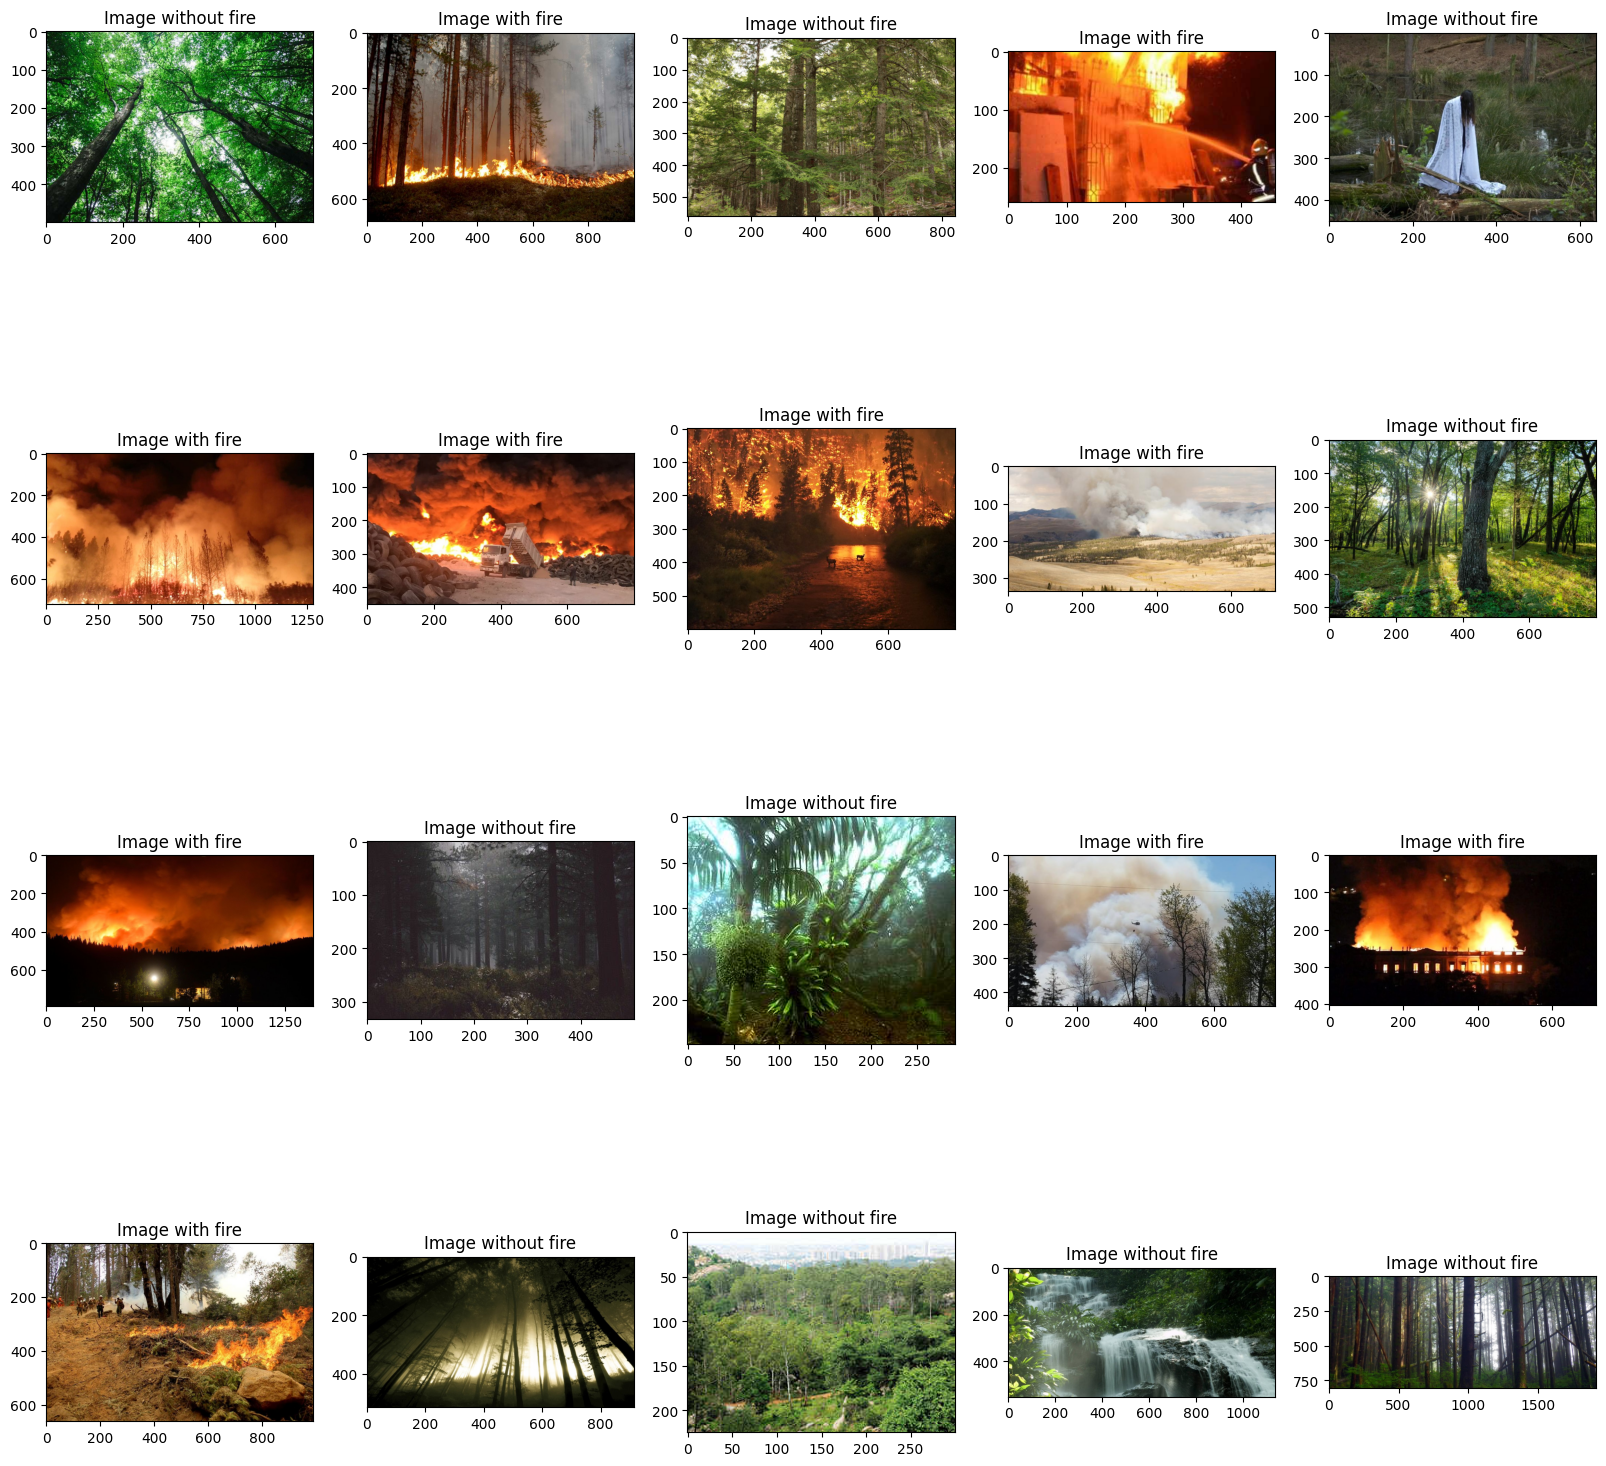

In [15]:
lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)


    if "non_fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()


In [16]:
lst_fire = []
for x in lst_fire_img:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img:
  lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)

In [17]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,non fire images\non_fire.133.png,0
1,fire images\fire.254.png,1
2,fire images\fire.440.png,1
3,non fire images\non_fire.98.png,0
4,fire images\fire.389.png,1
5,fire images\fire.412.png,1
6,fire images\fire.88.png,1
7,fire images\fire.670.png,1
8,non fire images\non_fire.143.png,0
9,non fire images\non_fire.72.png,0


In [18]:
filepath_img = 'non fire images\\non_fire.189.png'
df = df.loc[~(df.loc[:,'files'] == filepath_img),:]

In [19]:
df.shape

(998, 2)

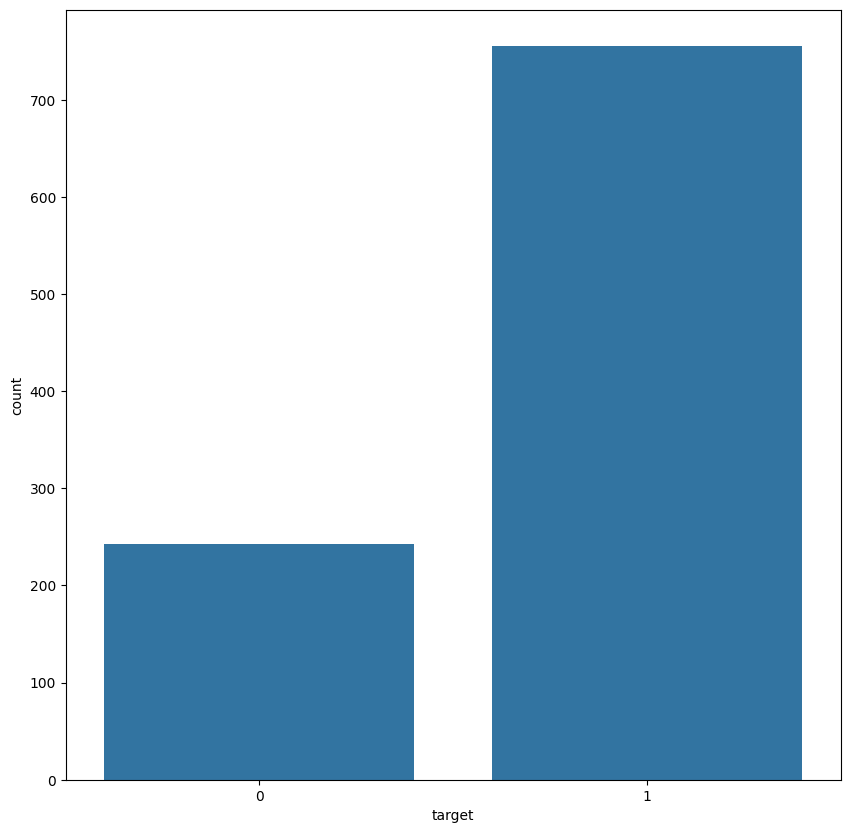

In [20]:
plt.figure(figsize = (10,10))


sns.countplot(x = "target",data = df)

plt.show()

In [21]:
def preprocessing_image(filepath):
  img = cv2.imread(filepath) #read
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
  img = cv2.resize(img,(196,196))  # resize
  img = img / 255 #scale
  return img 

In [22]:
def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)
  
  return np.array(X),np.array(y)

In [25]:
X, y = create_format_dataset(df)

In [24]:
X.shape,y.shape

((998, 196, 196, 3), (998,))

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y)

In [79]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((698, 196, 196, 3), (300, 196, 196, 3), (698,), (300,))

In [80]:
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 195, 195, 128)     1664      
                                                                 
 conv2d_7 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 97, 97, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 73728)            

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 30,batch_size = 32,callbacks = callbacks)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [ ]:
y_pred

In [ ]:
plt.figure(figsize = (20,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
model.save('Fire_Detection_DL_odel.h5')